<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign/SummaryFile/LabSlope.xlsx')
slope

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes
0,2299,3640924,66.80,2559-11-11 09:40:06.053,2016-11-11 09:40:06.053,87,NaN
1,2299,4020970,67.20,2560-03-31 10:18:54.363,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.20,2560-07-05 10:40:40.763,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.60,2560-10-03 09:19:54.710,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.40,2561-01-04 09:03:28.847,2018-01-04 09:03:28.847,92,-0.056522
...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2566-03-02 09:24:57.310,2023-03-02 09:24:57.310,83,-0.208313
280079,3432056,10235244,48.51,2566-01-09 12:31:53.220,2023-01-09 12:31:53.220,25,0.168400
280080,3432056,10306813,67.71,2566-01-27 12:22:43.000,2023-01-27 12:22:43.000,17,1.129412
280081,3432056,10408954,68.69,2566-02-24 21:05:12.747,2023-02-24 21:05:12.747,28,0.035000


In [3]:
slope.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
CWhen              False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

In [4]:
slope[slope['Slopes'].isnull()] # only the fisrt row

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2559-11-11 09:40:06.053,2016-11-11 09:40:06.053,87,NaN


In [5]:
slope = slope.dropna()
slope

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes
1,2299,4020970,67.20,2560-03-31 10:18:54.363,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.20,2560-07-05 10:40:40.763,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.60,2560-10-03 09:19:54.710,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.40,2561-01-04 09:03:28.847,2018-01-04 09:03:28.847,92,-0.056522
5,2299,5051781,62.40,2561-03-29 09:10:51.133,2018-03-29 09:10:51.133,84,0.047619
...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2566-03-02 09:24:57.310,2023-03-02 09:24:57.310,83,-0.208313
280079,3432056,10235244,48.51,2566-01-09 12:31:53.220,2023-01-09 12:31:53.220,25,0.168400
280080,3432056,10306813,67.71,2566-01-27 12:22:43.000,2023-01-27 12:22:43.000,17,1.129412
280081,3432056,10408954,68.69,2566-02-24 21:05:12.747,2023-02-24 21:05:12.747,28,0.035000


In [27]:
import numpy as np

# Desired quartiles and median
desired_Q1 = (-np.inf, -1)
desired_Q2 = (-1, 0)
desired_Q3 = (0, 1)
desired_Q4 = (1, np.inf)

# Create a function to categorize the slopes
def categorize_slope(s):
    if s <= desired_Q1[1]:
        return 'Q1'
    elif desired_Q1[1] < s <= desired_Q2[1]:
        return 'Q2'
    elif desired_Q2[1] < s <= desired_Q3[1]:
        return 'Q3'
    else:
        return 'Q4'

# Apply the categorization function to create a new column
slope['SlopeCategory'] = slope['Slopes'].apply(categorize_slope)

<ipython-input-27-c18337b7960b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['SlopeCategory'] = slope['Slopes'].apply(categorize_slope)


In [28]:
slope

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes,SlopeCategory
1,2299,4020970,67.20,2560-03-31 10:18:54.363,2017-03-31 10:18:54.363,140,0.002857,Q3
2,2299,4286612,69.20,2560-07-05 10:40:40.763,2017-07-05 10:40:40.763,96,0.020833,Q3
3,2299,4546471,63.60,2560-10-03 09:19:54.710,2017-10-03 09:19:54.710,89,-0.062921,Q2
4,2299,4801938,58.40,2561-01-04 09:03:28.847,2018-01-04 09:03:28.847,92,-0.056522,Q2
5,2299,5051781,62.40,2561-03-29 09:10:51.133,2018-03-29 09:10:51.133,84,0.047619,Q3
...,...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2566-03-02 09:24:57.310,2023-03-02 09:24:57.310,83,-0.208313,Q2
280079,3432056,10235244,48.51,2566-01-09 12:31:53.220,2023-01-09 12:31:53.220,25,0.168400,Q3
280080,3432056,10306813,67.71,2566-01-27 12:22:43.000,2023-01-27 12:22:43.000,17,1.129412,Q4
280081,3432056,10408954,68.69,2566-02-24 21:05:12.747,2023-02-24 21:05:12.747,28,0.035000,Q3


## **check**

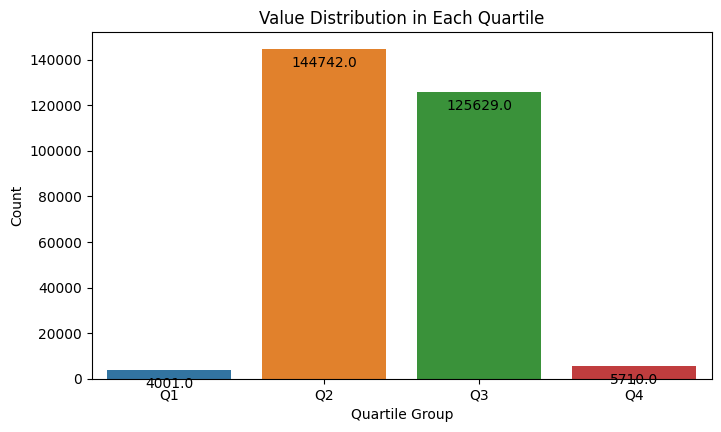

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quartile_counts = slope['SlopeCategory'].value_counts()
desired_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values, order=desired_order)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')
plt.show()

In [30]:
slope.groupby('SlopeCategory')['Slopes'].agg(['min', 'max'])

,min,max
SlopeCategory,,
Q1,-11.031429,-1.000000
Q2,-1.000000,0.000000
Q3,0.000020,1.000000
Q4,1.000370,14.291429


In [10]:
slope.groupby('SlopeCategory')['Slopes'].median()

SlopeCategory
Q1   -1.440714
Q2   -0.057619
Q3    0.066460
Q4    1.507143
Name: Slopes, dtype: float64

# **Excel**

In [11]:
quartile = slope[['PatientUID','PatientVisitUID','ResultValue','datetime','Slopes','TimeDiff','SlopeCategory']]
quartile

,PatientUID,PatientVisitUID,ResultValue,datetime,Slopes,TimeDiff,SlopeCategory
1,2299,4020970,67.20,2017-03-31 10:18:54.363,0.002857,140,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.020833,96,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,-0.062921,89,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.056522,92,Q2
5,2299,5051781,62.40,2018-03-29 09:10:51.133,0.047619,84,Q3
...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2023-03-02 09:24:57.310,-0.208313,83,Q2
280079,3432056,10235244,48.51,2023-01-09 12:31:53.220,0.168400,25,Q3
280080,3432056,10306813,67.71,2023-01-27 12:22:43.000,1.129412,17,Q4
280081,3432056,10408954,68.69,2023-02-24 21:05:12.747,0.035000,28,Q3


In [12]:
quartile.to_excel("Quartile.xlsx", index=False)